In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
import pickle
import sys
%matplotlib inline

In [145]:
# https://classic.fec.gov/finance/disclosure/ftpdet.shtml#a2017_2018

cc_raw = pd.read_csv('data/taiwan_cc/default_of_credit_card_clients.csv', index_col='ID')
cc_classes = cc_raw['default_payment_next_month']
cc_df = cc_raw.drop('default_payment_next_month', axis=1)
display(cc_raw.head(5))
display(cc_df.head(5))
display(cc_classes.head(5))
display(cc_raw.shape)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID                    ...                                                
1      -2             ...                      0          0          0   
2       0             ...                   3272       3455       3261   
3       0             ...                  14331      14948      15549   
4       0             ...                  28314      28959      29547   
5       0             ...                  20940      19146      19131   

    PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                               
1          0       689         0         0         0         0   
2          0      1000      1000      1000         0      2000   
3       1518      1500      1000      1000      1000      5000   
4       2000      2019      1200      1100      1069      1000   
5       2000     36681     10000      9000       689       679   

    default_payment_next_month  
ID                              
1                            1  
2                            1  
3                            0  
4                            0  
5                            0  

[5 rows x 24 columns]

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
ID           ...                                                            
1      -2    ...           689          0          0          0         0   
2       0    ...          2682       3272       3455       3261         0   
3       0    ...         13559      14331      14948      15549      1518   
4       0    ...         49291      28314      28959      29547      2000   
5       0    ...         35835      20940      19146      19131      2000   

    PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
ID                                                    
1        689         0         0         0         0  
2       1000      1000      1000         0      2000  
3       1500      1000      1000      1000      5000  
4       2019      1200      1100      1069      1000  
5      36681     10000      9000       689       679  

[5 rows x 23 columns]

ID
1    1
2    1
3    0
4    0
5    0
Name: default_payment_next_month, dtype: int64

(30000, 24)

## Data Exploration

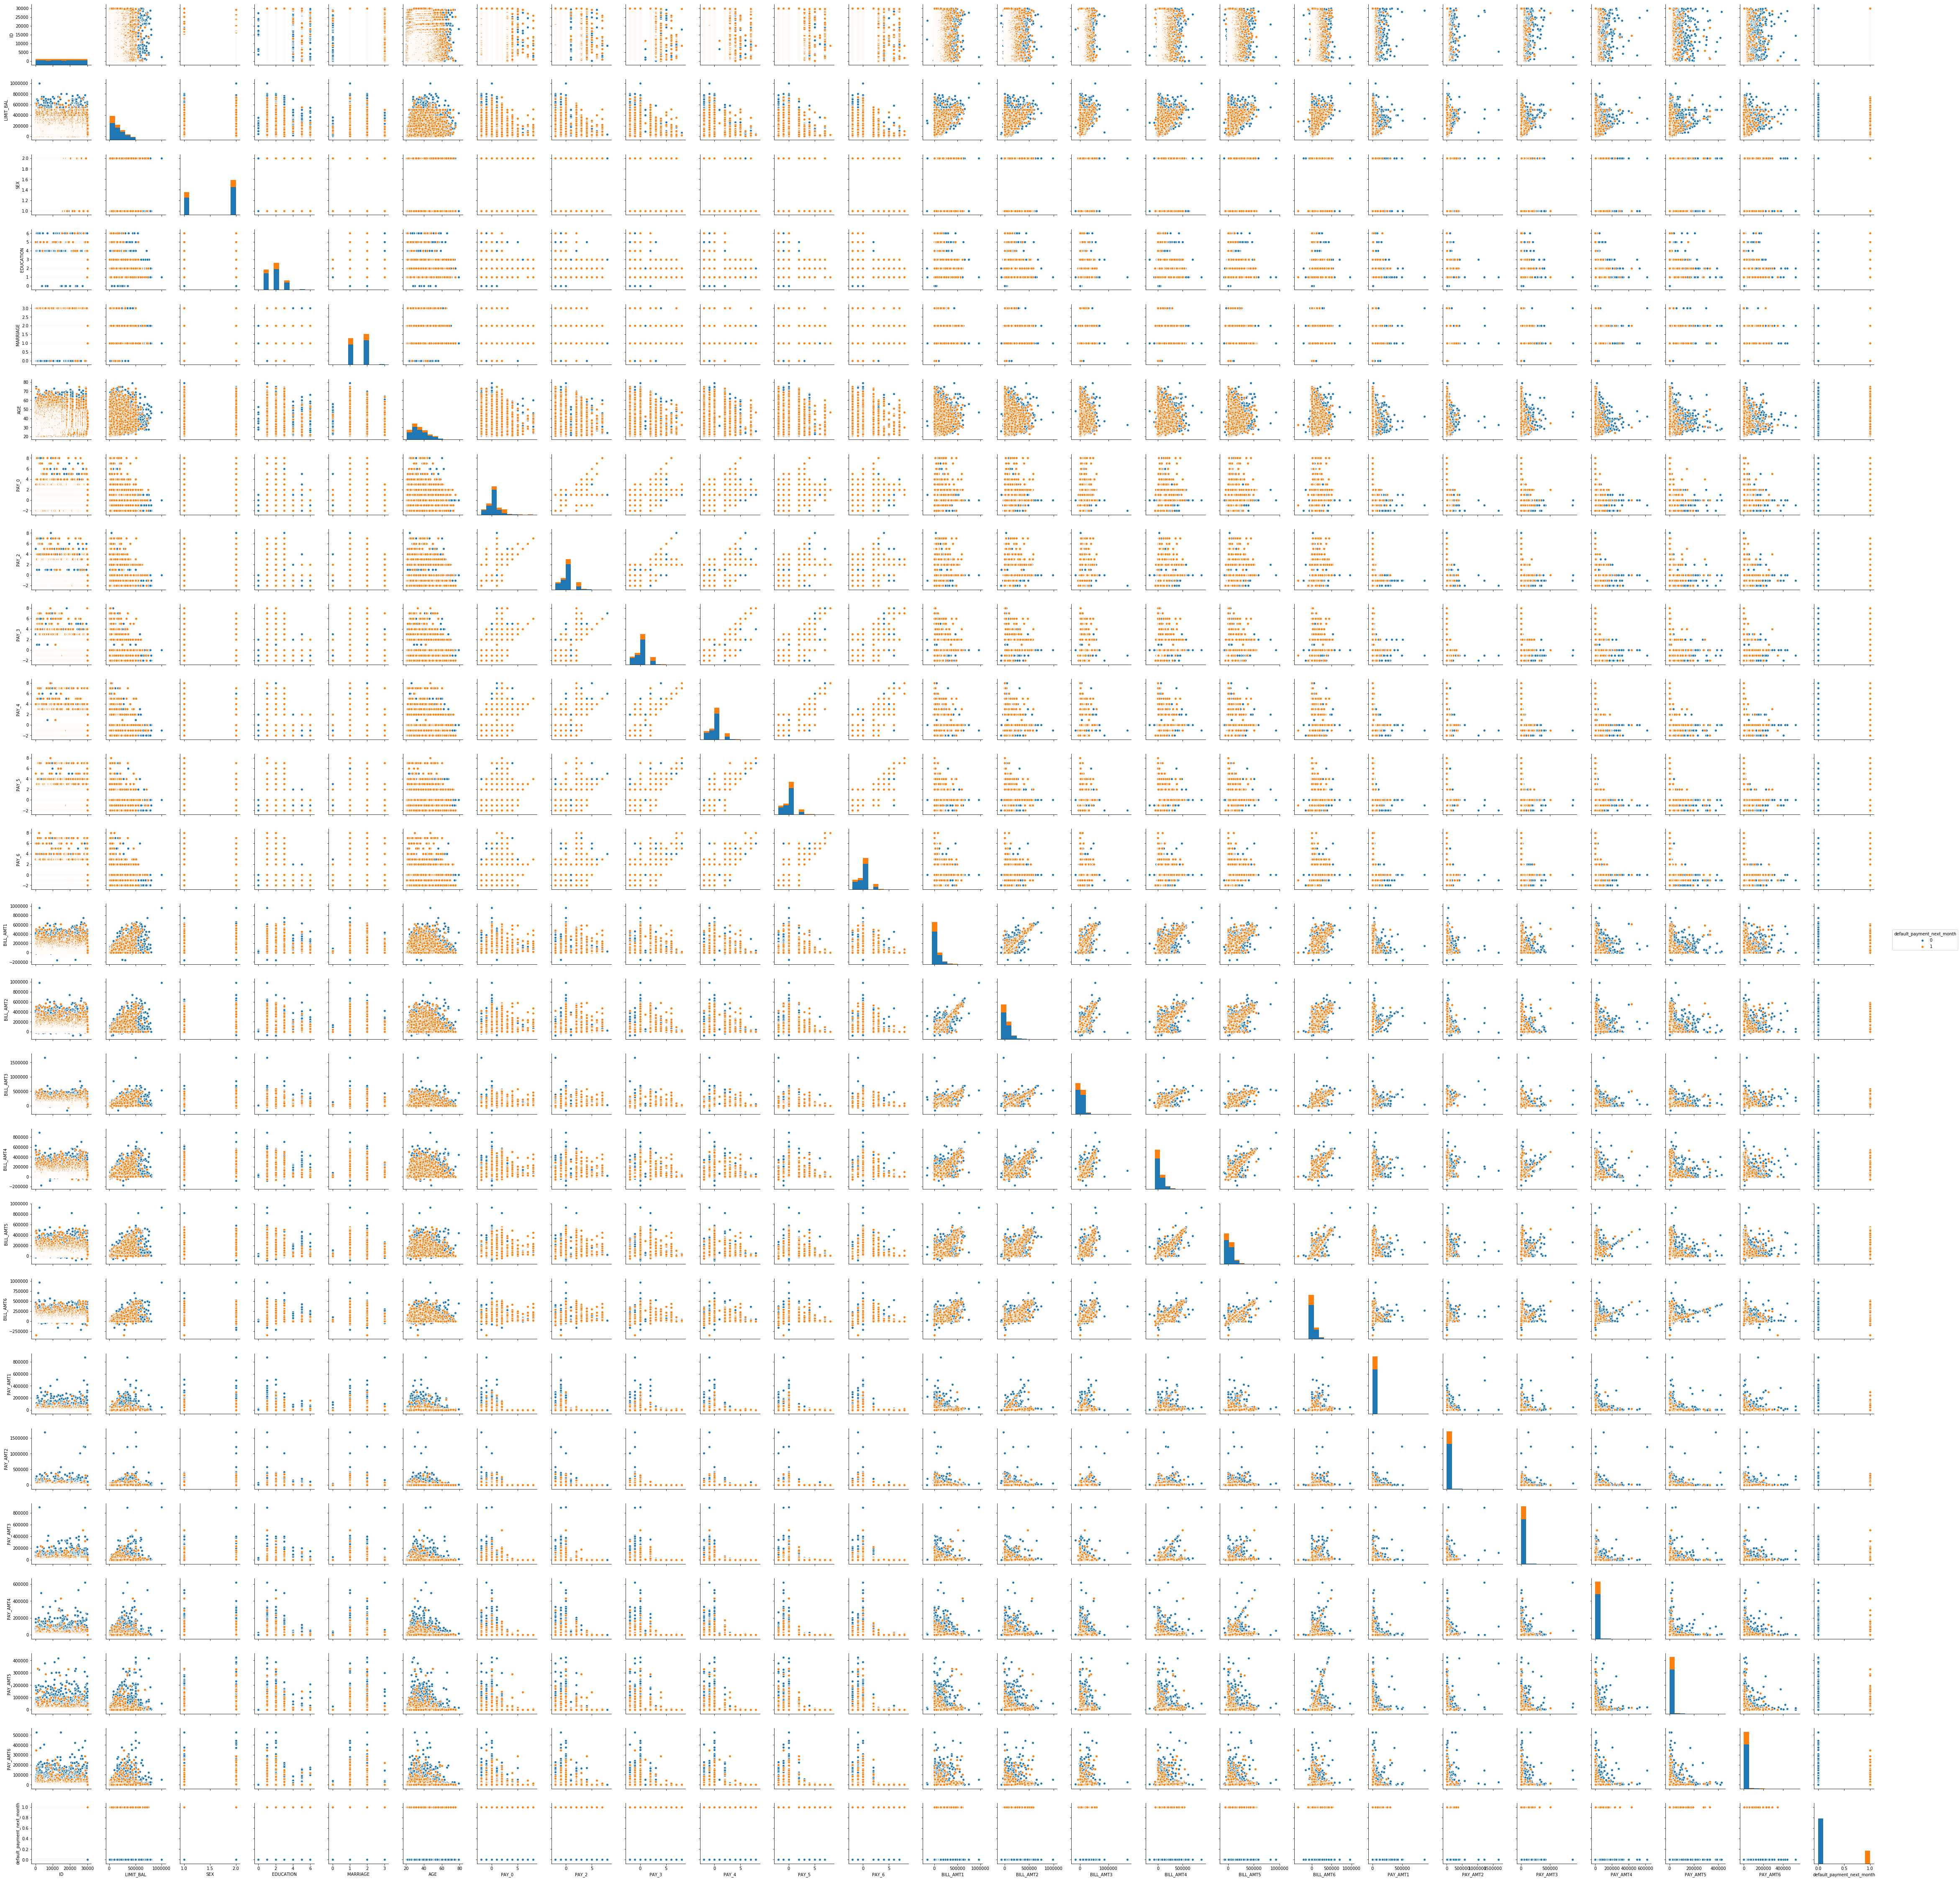

In [3]:
# g = sns.pairplot(cc_df, hue='default_payment_next_month')

In [4]:
# with open('data/taiwan_cc/cc_pairplot.pickle', 'xb') as f:
#     pickle.dump(g, f)
    
# with open('data/taiwan_cc/cc_pairplot.pickle', 'rb') as f:
#     g = pickle.load(f)

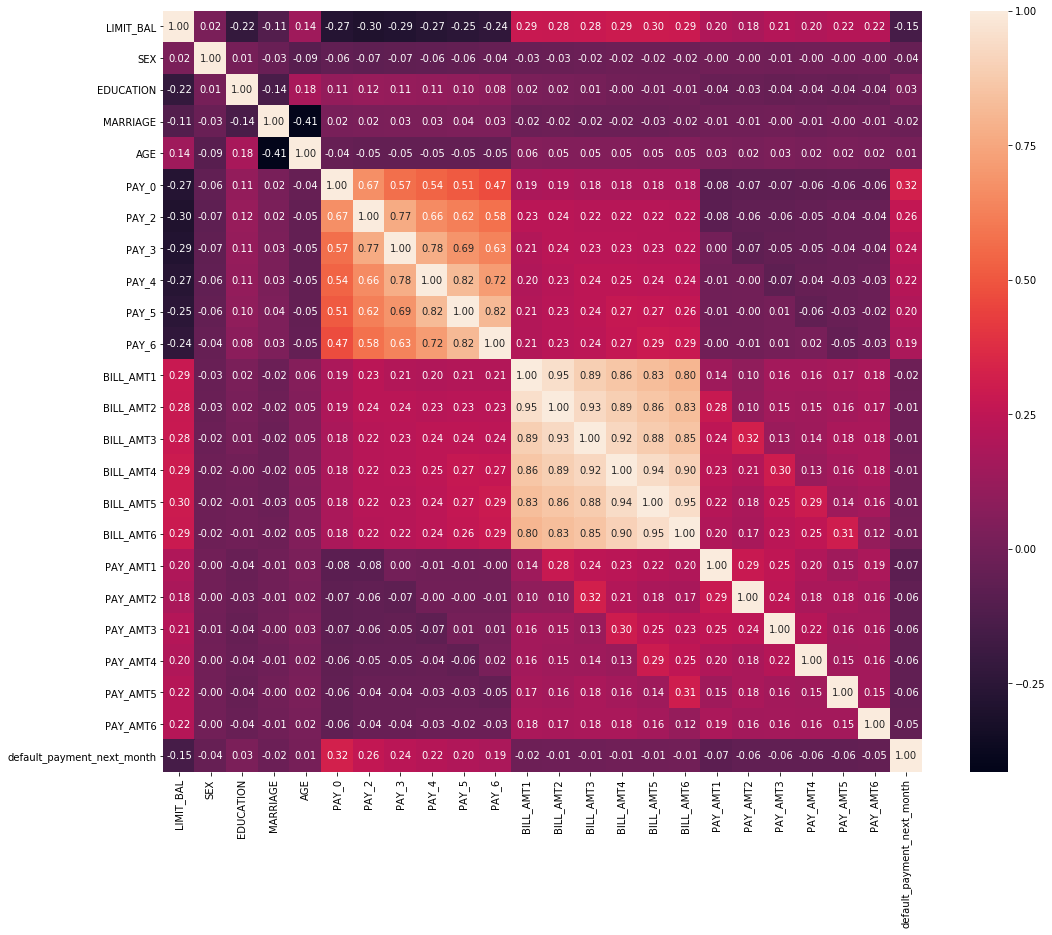

In [5]:
f, ax = plt.subplots(figsize=(17,14))
sns.heatmap(cc_raw.corr(), cbar=True, annot=True, fmt='.2f')

Looking at the correlation matrix above (represented as a heatmap), we see that 'PAY_0' is the feature with the strongest correlation to 'default_payment_next_month', but it only has a $0.32$ Pearson correlation coefficient, and there's a 

In [3]:
# This produces a rather attractive scatterplot 
# df:         a dataframe that contains featureA, featureB, and class_variable
# featureA:   a String representation of one of the columns in DF
# featureB:   a String representation of another of the columns in DF
# class_var:  a String representation of one the class labels column in DF
def feature_compare(df, featureA, featureB, class_var='default_payment_next_month'):
    g = sns.FacetGrid(data=df[[class_var, featureA, featureB]],hue=class_var,
                      hue_order=[0,1], aspect=1, size=5)
    fig = g.fig
    g.map(plt.scatter, featureA, featureB).add_legend()
    fig.suptitle(featureA + ' VS. ' + featureB)

In [10]:
cc_raw.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [60]:
cc_raw.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               30000.000000   30000.000000   
mean              ...               43262.948967   40311.400967   
std               ...               64332.856134   60797.155770   
min               ...             -170000.000000  -81334.000000   
25%               ...                2326.750000    1763.000000   
50%               ...               19052.000000   18104.500000   
75%               ...               54506.000000   50190.500000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count   30000.000000   30000.000000  3.000000e+04   30000.00000   
mean    38871.760400    5663.580500  5.921163e+03    5225.68150   
std     59554.107537   16563.280354  2.304087e+04   17606.96147   
min   -339603.000000       0.000000  0.000000e+00       0.00000   
25%      1256.000000    1000.000000  8.330000e+02     390.00000   
50%     17071.000000    2100.000000  2.009000e+03    1800.00000   
75%     49198.250000    5006.000000  5.000000e+03    4505.00000   
max    961664.000000  873552.000000  1.684259e+06  896040.00000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default_payment_next_month  
count   30000.000000   30000.000000   30000.000000                30000.000000  
mean     4826.076867    4799.387633    5215.502567                    0.221200  
std     15666.159744   15278.305679   17777.465775                    0.415062  
min         0.000000       0.000000       0.000000                    0.000000  
25%       296.000000     252.500000     117.750000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4013.250000    4031.500000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 24 columns]

<function matplotlib.pyplot.tight_layout>

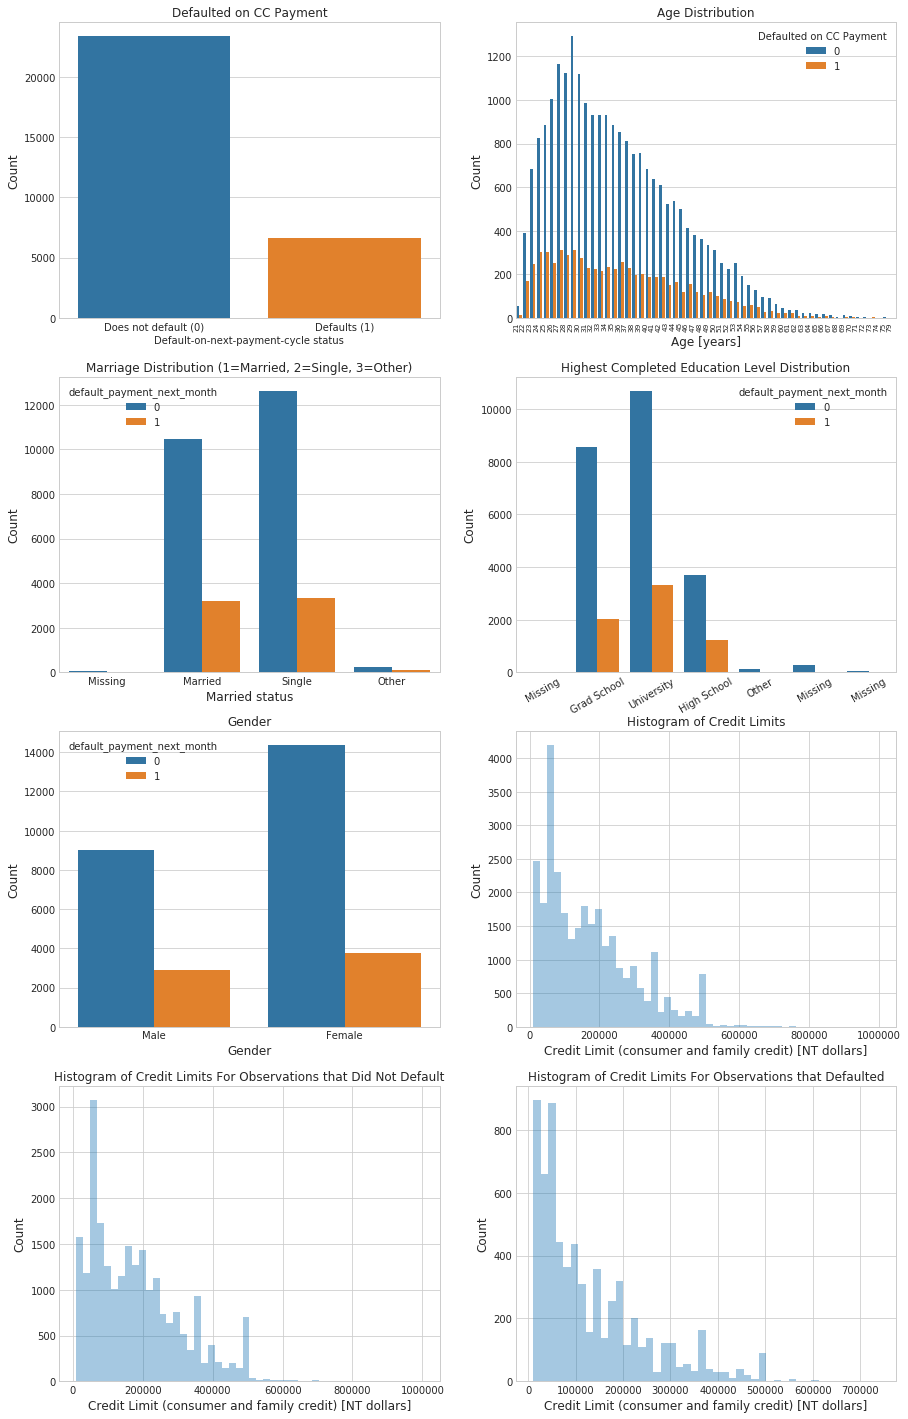

In [142]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(15,25))
    ax = ax.flatten()
#     fig.suptitle(title)
    sns.countplot(x='default_payment_next_month', data=cc_raw, ax=ax[0])
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_xticklabels(['Does not default (0)', 'Defaults (1)'])
    ax[0].set_xlabel('Default-on-next-payment-cycle status')
    ax[0].set_title('Defaulted on CC Payment')
    sns.countplot(x='AGE', data=cc_raw, hue='default_payment_next_month', ax=ax[1])
    ax[1].set_xlabel('Age [years]', fontsize=12)
    ax[1].set_ylabel('Count', fontsize=12)
    ax[1].set_xticklabels(cp1.get_xticklabels(), rotation=90, ha='right', fontsize=7.5)
    ax[1].legend(loc='upper right', title='Defaulted on CC Payment')
    ax[1].set_title('Age Distribution')
    sns.countplot(x='MARRIAGE', data=cc_raw, hue='default_payment_next_month', ax=ax[2])
    ax[2].set_xlabel('Married status', fontsize=12)
    ax[2].set_xticklabels(['Missing', 'Married', 'Single', 'Other'])
    ax[2].set_ylabel('Count', fontsize=12)
    ax[2].set_title('Marriage Distribution (1=Married, 2=Single, 3=Other)')
    sns.countplot(x='EDUCATION', data=cc_raw, hue='default_payment_next_month', ax=ax[3])
    ax[3].set_xlabel('', fontsize=12)
    ax[3].set_xticklabels(['Missing','Grad School','University','High School','Other','Missing','Missing'],
                         rotation=30)
    ax[3].set_ylabel('Count', fontsize=12)
    ax[3].set_title('Highest Completed Education Level Distribution') 
    
    sns.countplot(x='SEX', data=cc_raw, hue='default_payment_next_month', ax=ax[4])
    ax[4].set_xlabel('Gender', fontsize=12)
    ax[4].set_xticklabels(['Male', 'Female'])
    ax[4].set_ylabel('Count', fontsize=12)
    ax[4].set_title('Gender')
    # Not including a number of bins, distplot uses the Freedman-Diaconis rule by default
    sns.distplot(cc_raw['LIMIT_BAL'], norm_hist=False, kde=False, ax=ax[5])
    ax[5].set_xlabel('Credit Limit (consumer and family credit) [NT dollars]', fontsize=12)
    ax[5].set_ylabel('Count', fontsize=12)
    ax[5].set_title('Histogram of Credit Limits')
    sns.distplot(cc_raw['LIMIT_BAL'][cc_raw['default_payment_next_month']==0], 
                 norm_hist=False, kde=False, ax=ax[6])
    ax[6].set_xlabel('Credit Limit (consumer and family credit) [NT dollars]', fontsize=12)
    ax[6].set_ylabel('Count', fontsize=12)
    ax[6].set_title('Histogram of Credit Limits For Observations that Did Not Default')
    sns.distplot(cc_raw['LIMIT_BAL'][cc_raw['default_payment_next_month']==1], 
                 norm_hist=False, kde=False, ax=ax[7])
    ax[7].set_xlabel('Credit Limit (consumer and family credit) [NT dollars]', fontsize=12)
    ax[7].set_ylabel('Count', fontsize=12)
    ax[7].set_title('Histogram of Credit Limits For Observations that Defaulted')
plt.tight_layout

In [143]:
cc_raw.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

### Data Set Feature Descriptions

|--- Feature Name ---|-------- Feature Description --------|------------------  Defined Values  ------------------|
| :--------------: | --------------------: | :---------------- |
| $default\_payment\_next\_month$ | Binary Target Feature indicating a Default on Payment | $0=\text{No Default}$ |
|  |  | $1=\text{Default}$ |
| $LIMIT\_BAL$ | Ammount of available consumer and family credit [NT \$] | $LIMIT\_BAL \geq 0$ |
| $SEX$ | Gender  | $1=\text{Male}$ |
|  |  | $2=\text{Female}$ |
| $EDUCATION$ | Highest completed education level | $1=\text{Grad School}$ |
|  |  | $2=\text{University}$ |
|  |  | $3=\text{High School}$ |
|  |  | $4=\text{Other}$ |
| $MARRIAGE$ | Marital Status | $1=\text{Married}$ |
|  |  | $2=\text{Single}$ |
|  |  | $3=\text{Other}$ |
| $AGE$ | Age | $AGE \geq 0$ |
| $PAY\_x$ | Number of months delinquent 'x' months ago | $-1=\text{no delinquency}$ |
|  |  | $ 1\text{ up to }N=\text{Delinquent 1 to N months}$ |
| $BILL\_AMT\_x$ | Ammount of bill statement 'x' months ago [NT \$] | Any real number (negative values are credits) |
| $PAY\_AMT\_x$ | Amount paid 'x' months ago [NT \$] | $PAY\_AMT\_x \geq 0$ |

### Exploratory Data Analysis

Per the data descriptions, the $MARRIAGE$ feature should only include values 1, 2, and 3, so I will treat the 0s observed in the data as missing values. Per the count below, 54 of 30000 observations (or $0.18\%$) have a missing value for $MARRIAGE$. 

Also, $EDUCATION$ only includes values from $1$ to $4$, but values of $0$, $5$, and $6$ were observed in the data. They will also be treated as missing variables. Per the count below, 345 of 30000 observations (or $1.15\%$) have a missing value for $EDUCATION$. 

As the distribution of target labels is very imbalanced , I'll use SMOTE 

In [158]:
marriage_0s = cc_raw['MARRIAGE'][cc_raw['MARRIAGE'] == 0]
edu_NAs = cc_raw['EDUCATION'][cc_raw['EDUCATION'].isin([0,5,6])]
print('There are {} records in the data set where MARRIAGE == 0'.format(len(marriage_0s)))
print('There are {} records in the data set where EDUCATION != a defined value (ie [1,2,3,4])'
      .format(len(edu_NAs)))

There are 54 records in the data set where MARRIAGE == 0
There are 345 records in the data set where EDUCATION != a defined value (ie [1,2,3,4])


In [147]:
# gauss_data = {'mean_acc': score_means,
#               'mean_std': score_stdevs,
#               'sigma':sigma_list,
#               'C':c_list}
# gauss_df = pd.DataFrame(gauss_data)
cc_raw.columns

# tmp_data = pd.DataFrame(cc_df, columns=['AGE','MARRIAGE'])
# type(cc_raw['AGE'])
# cc_raw['MARRIAGE'][cc_raw['MARRIAGE'] == 0]
345/30000

0.0115

In [ ]:
with sns.axes_style("whitegrid"):
    g = sns.PairGrid(df, diag_sharey=False, size=4)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_upper(plt.scatter)
    g.map_diag(sns.kdeplot, lw=3)
    g.fig.text(0.27, 1.02, 'Age, Income, and Children Distributions',fontsize=20)

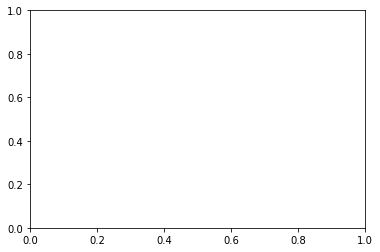

In [160]:
# help(pickle)
# help(open)
ax1 = plt.axes()
# help(ax1.xaxis.set_major_locator(plt.MultipleLocator))
# help(plt.MultipleLocator)
# help(plt.LinearLocator)
# help(np.arange)
# help(ax1.xaxis)
# help(sns.countplot)